# Car Prices

🎯 The goal of this challenge is to prepare a dataset and apply some feature selection techniques that you have learned so far.

🚗 We are dealing with a dataset about cars and we would like to predict whether a car is expensive or cheap.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Checking whether a numerical feature has a normal distribution or not

#Feature Scaler and encoder for our data
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression 

In [2]:
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv"

❓ Go ahead and load the CSV into a dataframe called `df`.

In [3]:
df = pd.read_csv(url)

In [4]:
df.head(5)

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive


ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt). Make sure to refer to it throughout the exercise.

## (1) Duplicates

❓ Remove the duplicates from the dataset if there are any. ❓

*Overwite the dataframe `df`*

In [5]:
df.drop_duplicates(inplace=True)

## (2) Missing values

❓ Find the missing values and impute them either with `strategy = "most frequent"` (categorical variables) or `strategy = "median"` (numerical variables) ❓


In [6]:
#Instance our imputers
median_imputer = SimpleImputer(strategy='median')
mf_imputer = SimpleImputer(strategy='most_frequent')

In [7]:
#Fitting and transforming enginelocation
mf_imputer.fit(df[['enginelocation']])

df['enginelocation'] = mf_imputer.transform(df[['enginelocation']]) 

In [8]:
#Checking for remaining null values
df.isnull().sum()

aspiration        0
enginelocation    0
carwidth          2
curbweight        0
enginetype        0
cylindernumber    0
stroke            0
peakrpm           0
price             0
dtype: int64

### `carwidth`

<details>
    <summary> 💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>carwidth</code> has multiple representations for missing values. Some are <code>np.nans</code>, some are  <code>*</code>. Once located, they can be imputed by the median value, since missing values make up less than 30% of the data.
</details> 

In [9]:
#Checking our column for non-numeric occurrences
print(df.carwidth.value_counts())
#Replacing value (*) for np.nan
df['carwidth'] = df['carwidth'].replace('*', np.nan)

66.5    22
63.8    19
65.4    15
63.6     9
68.4     9
64       9
64.4     9
65.5     8
65.2     7
65.6     6
64.2     6
67.2     6
66.3     6
66.9     5
67.9     5
*        4
68.9     4
65.7     3
71.7     3
70.3     3
63.9     3
64.8     3
71.4     2
67.7     2
68.3     2
65       2
72.3     1
66.6     1
63.4     1
64.1     1
68       1
72       1
70.5     1
66.1     1
70.6     1
69.6     1
61.8     1
66       1
64.6     1
60.3     1
70.9     1
66.4     1
68.8     1
Name: carwidth, dtype: int64


In [10]:
#Fitting and transforming carwidth
median_imputer.fit(df[['carwidth']])

df['carwidth'] = median_imputer.transform(df[['carwidth']])

In [11]:
#Checking for remaining null values
df.isnull().sum()

aspiration        0
enginelocation    0
carwidth          0
curbweight        0
enginetype        0
cylindernumber    0
stroke            0
peakrpm           0
price             0
dtype: int64

### `enginelocation`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ Considering that <code>enginelocation</code> is a categorical feature, and that the vast majority of the category is <code>front</code>, impute with the most frequent.
</details>

In [12]:
##Checking our column for non-numeric occurrences
print(df.enginelocation.value_counts())

front    189
rear       2
Name: enginelocation, dtype: int64


In [13]:
#Fitting and transforming enginelocation
mf_imputer.fit(df[['enginelocation']])

df['enginelocation'] = mf_imputer.transform(df[['enginelocation']]) 

🧪 **Test your code**

In [14]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = df)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/rcamoes/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/rcamoes/code/rcamoes2/data-car-prices/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_missing_values.py::TestMissing_values::test_carwidth PASSED         [ 50%]
test_missing_values.py::TestMissing_values::test_engine_location PASSED  [100%]

============================== 2 passed in 0.29s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master



## (3) Scaling the numerical features

In [15]:
# As a reminder, some information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      191 non-null    object 
 1   enginelocation  191 non-null    object 
 2   carwidth        191 non-null    float64
 3   curbweight      191 non-null    int64  
 4   enginetype      191 non-null    object 
 5   cylindernumber  191 non-null    object 
 6   stroke          191 non-null    float64
 7   peakrpm         191 non-null    int64  
 8   price           191 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 14.9+ KB


In [16]:
# And here are the numerical features of the dataset we need to scale
numerical_features = df.select_dtypes(exclude=['object']).columns
numerical_features

Index(['carwidth', 'curbweight', 'stroke', 'peakrpm'], dtype='object')

❓ **Question: Scaling the numerical features** ❓

Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scaler
- Standard Scaler

Replace the original columns with the transformed values.

In [17]:
#Having our numerical features, we will scale our features accordingly.
#Columns to analyze: ['carwidth', 'curbweight', 'stroke', 'peakrpm']

In [18]:
#Identifying Outliers of data['column']
df['carwidth'].describe().round()

count    191.0
mean      66.0
std        2.0
min       60.0
25%       64.0
50%       66.0
75%       67.0
max       72.0
Name: carwidth, dtype: float64

<AxesSubplot:xlabel='carwidth', ylabel='Count'>

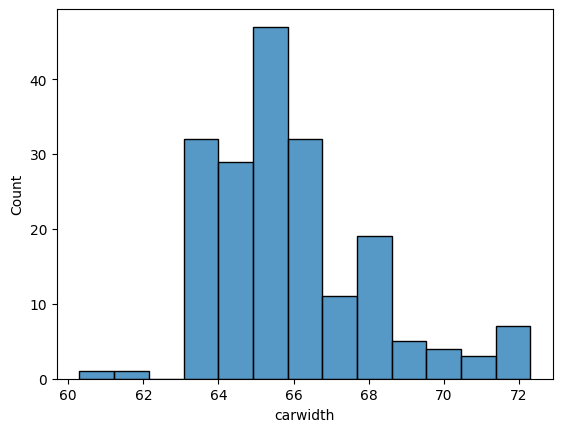

In [19]:
#checking gaussian distribution
sns.histplot(x='carwidth', data=df)

In [20]:
#no gaussian distribution

<AxesSubplot:xlabel='carwidth'>

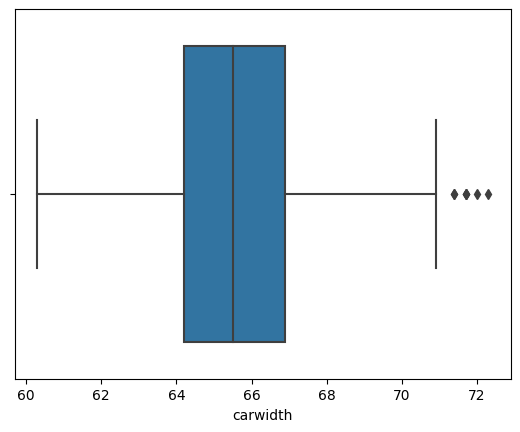

In [21]:
#checking outliers
sns.boxplot(data=df, x='carwidth')

In [22]:
#Outliers, robustscaler

In [23]:
#RobustScaler for carwidth
rb_scaler = RobustScaler()
rb_scaler.fit(df[['carwidth']])
df['carwidth'] = rb_scaler.transform(df[['carwidth']])

In [24]:
#Identifying Outliers of data['curbweight']
df['curbweight'].describe().round()

count     191.0
mean     2573.0
std       526.0
min      1488.0
25%      2190.0
50%      2443.0
75%      2964.0
max      4066.0
Name: curbweight, dtype: float64

<AxesSubplot:xlabel='curbweight', ylabel='Count'>

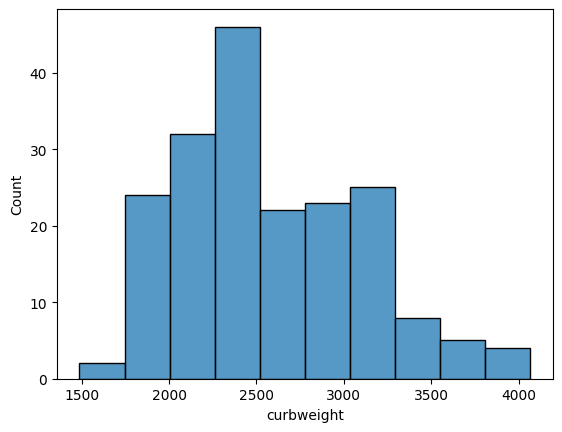

In [25]:
#checking gaussian distribution
sns.histplot(x='curbweight', data=df)

In [26]:
#No gaussian distribution

<AxesSubplot:xlabel='curbweight'>

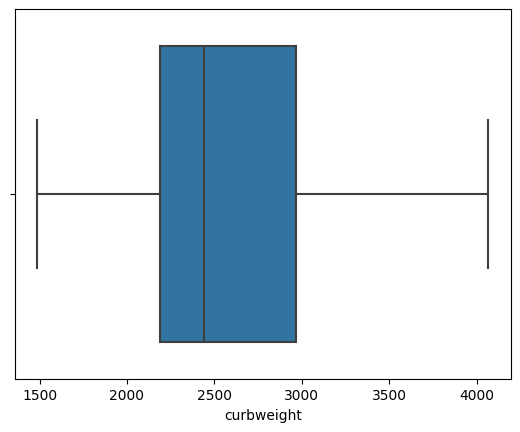

In [27]:
#checking outliers
sns.boxplot(data=df, x='curbweight')

In [28]:
#No outliers, minmaxscaler

In [29]:
#MinMaxScaler for curbweight
m_scaler = MinMaxScaler()

In [30]:
m_scaler.fit(df[['curbweight']])
df['curbweight'] = m_scaler.transform(df[['curbweight']])

In [31]:
#Identifying Outliers of data['stroke']
df['stroke'].describe().round()

count    191.0
mean       3.0
std        0.0
min        2.0
25%        3.0
50%        3.0
75%        3.0
max        4.0
Name: stroke, dtype: float64

<AxesSubplot:xlabel='stroke', ylabel='Count'>

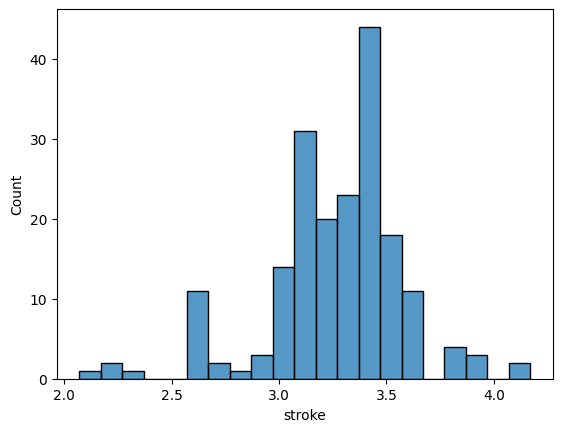

In [32]:
#checking gaussian distribution
sns.histplot(x='stroke', data=df)

In [33]:
#No gaussian distribution

<AxesSubplot:xlabel='stroke'>

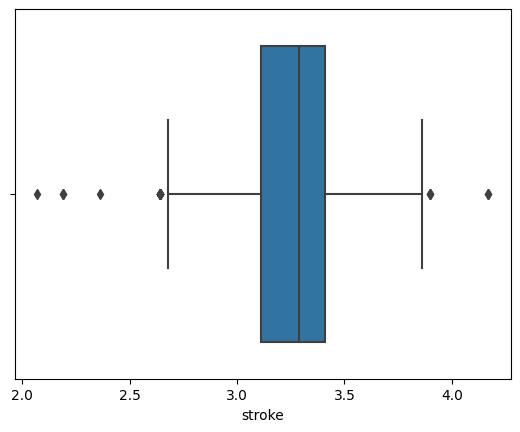

In [34]:
#checking outliers
sns.boxplot(data=df, x='stroke')

In [35]:
r_scaler = RobustScaler()
r_scaler.fit(df[['stroke']])
df['stroke'] = r_scaler.transform(df[['stroke']])

In [36]:
#Identifying Outliers of data['peakrpm']
df['peakrpm'].describe().round()

count     191.0
mean     5113.0
std       472.0
min      4150.0
25%      4800.0
50%      5100.0
75%      5500.0
max      6600.0
Name: peakrpm, dtype: float64

<AxesSubplot:xlabel='peakrpm', ylabel='Count'>

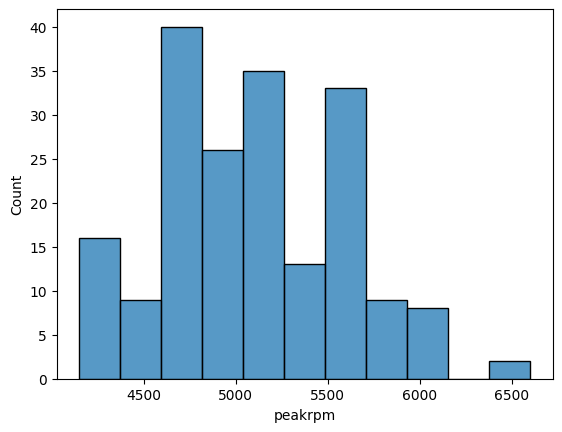

In [37]:
#checking gaussian distribution
sns.histplot(x='peakrpm', data=df)

<AxesSubplot:xlabel='peakrpm'>

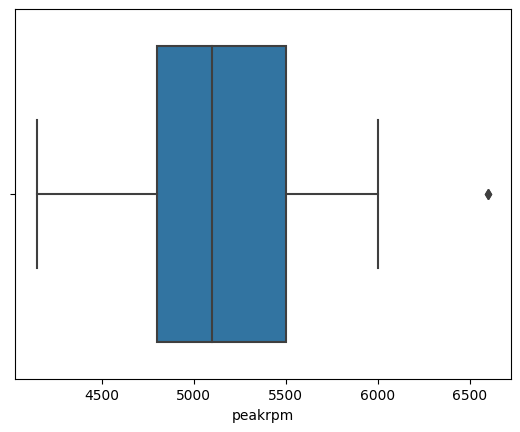

In [38]:
#checking outliers
sns.boxplot(data=df, x='peakrpm')

In [39]:
r_scaler = RobustScaler()
r_scaler.fit(df[['peakrpm']])
df['peakrpm'] = r_scaler.transform(df[['peakrpm']])

### `peakrpm` , `carwidth` , & `stroke`

<details>
    <summary>💡 <i>Hint</i> </summary>

    
ℹ️ <code>peakrpm</code>, <code>carwidth</code>, & <code>stroke</code> have normal distributions but also some outliers. Hence, it is advisable to use `RobustScaler()`.
</details>

In [40]:
# YOUR CODE HERE

In [41]:
# YOUR CODE HERE

### `curbweight`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>curbweight</code> has a normal distribution and no outliers. It can be Standard Scaled.
</details>

In [42]:
#MinMax scaler for carwidth
m_scaler = MinMaxScaler()
m_scaler.fit(df[['carwidth']])
df['carwidth'] = m_scaler.transform(df[['carwidth']])

In [43]:
# YOUR CODE HERE

🧪 **Test your code**

In [44]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = df
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/rcamoes/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/rcamoes/code/rcamoes2/data-car-prices/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 4 items

test_scaling.py::TestScaling::test_carwidth FAILED                       [ 25%]
test_scaling.py::TestScaling::test_curbweight PASSED                     [ 50%]
test_scaling.py::TestScaling::test_peakrpm PASSED                        [ 75%]
test_scaling.py::TestScaling::test_stroke PASSED                         [100%]

=================================== FAILURES ===================================
__________________________ TestScaling.test_carwidth ___________________________

self = <tests.test_scaling.TestScaling testMethod=test_carwidth>

    def test_carwidth(self):
>       self.assertEqual(self.result.dataset.carwid

## (4) Encoding the categorical features

❓ **Question: encoding the categorical variables** ❓

👇 Investigate the features that require encoding, and apply the following techniques accordingly:

- One-hot encoding
- Manual ordinal encoding

In the Dataframe, replace the original features with their encoded version(s).

### `aspiration` & `enginelocation`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>aspiration</code> and <code>enginelocation</code> are binary categorical features.
</details>

In [45]:
#Engine Location is a binary feature

# Check unique values for enginelocation
print(f"The unique values for 'enginelocation' are {df.enginelocation.unique()}")

# Instantiate the OneHotEncoder
ohe_binary = OneHotEncoder(sparse = False, drop="if_binary")

# Fit encoder
ohe_binary.fit(df[['enginelocation']])

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe_binary.categories_}")

#Transforming our model
df['enginelocation'] = ohe_binary.transform(df[['enginelocation']])
df.enginelocation.head(5)

The unique values for 'enginelocation' are ['front' 'rear']
The categories detected by the OneHotEncoder are [array(['front', 'rear'], dtype=object)]


0    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: enginelocation, dtype: float64

In [46]:
#Aspiration is a binary feature
# Check unique values for aspiration
print(f"The unique values for 'aspiration' are {df.aspiration.unique()}")

# Instantiate the OneHotEncoder
ohe_binary = OneHotEncoder(sparse = False, drop="if_binary")

# Fit encoder
ohe_binary.fit(df[['aspiration']])

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe_binary.categories_}")

#Transforming our model
df['aspiration'] = ohe_binary.transform(df[['aspiration']])
df.aspiration.head(5)

The unique values for 'aspiration' are ['std' 'turbo']
The categories detected by the OneHotEncoder are [array(['std', 'turbo'], dtype=object)]


0    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: aspiration, dtype: float64

### `enginetype`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>enginetype</code> is a multicategorical feature and must be One hot encoded.
</details>

In [47]:
df.enginetype.value_counts()

ohc      138
ohcf      14
ohcv      13
dohc      11
l         11
rotor      3
dohcv      1
Name: enginetype, dtype: int64

In [48]:
#Engine type is a multicategorical feature, meaning onehotencoder

In [49]:
# Check unique values for enginetype
print(f"The unique values for 'enginetype' are {df.enginetype.unique()}")

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse = False) 

# Fit encoder
ohe.fit(df[['enginetype']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

The unique values for 'enginetype' are ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
The categories detected by the OneHotEncoder are [array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)]


In [50]:
ohe.transform(df[['enginetype']])

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "Enginetype" column
df[ohe.get_feature_names_out()] = ohe.transform(df[['enginetype']])

# Drop the column "enginetype" which has been encoded
df.drop(columns = ["enginetype"], inplace = True)

# Show the dataset
df.head(3)

The column names for the encoded values are ['enginetype_dohc' 'enginetype_dohcv' 'enginetype_l' 'enginetype_ohc'
 'enginetype_ohcf' 'enginetype_ohcv' 'enginetype_rotor']


,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,0.316667,0.411171,four,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.433333,0.517843,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.433333,0.329325,four,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [52]:
df.shape

(191, 15)

### `cylindernumber`

<details>
    <summary>💡 Hint </summary>

ℹ️ <code>cylindernumber</code> is an ordinal feature and must be manually encoded into numeric.

</details>

In [53]:
df.cylindernumber.value_counts()

four      147
six        23
five       11
eight       5
two         3
three       1
twelve      1
Name: cylindernumber, dtype: int64

❓ Now that you've made `cylindernumber` into a numeric feature between 2 and 12, you need to scale it ❓

<br/>

<details>
    <summary>💡 Hint </summary>

Look at the current distribution of the `cylindernumber` and ask yourself the following questions:
- Does scaling affect a feature's distribution ?
- According to the distribution of this feature, what is the most appropriate scaling method?
</details>

In [54]:
df['cylindernumber'] = df['cylindernumber'].map({'four': 4,
                                                 'six': 6,
                                                 "five":5,
                                                 'three': 3,
                                                 'twelve':12,
                                                 'two':2,
                                                 'eight':8})

In [55]:
df.cylindernumber.value_counts()

4     147
6      23
5      11
8       5
2       3
3       1
12      1
Name: cylindernumber, dtype: int64

<AxesSubplot:xlabel='cylindernumber', ylabel='Count'>

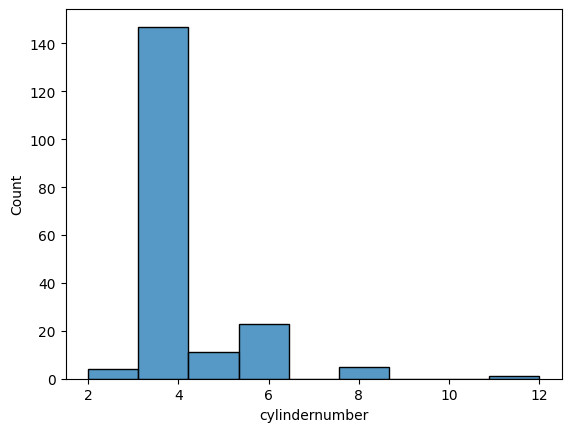

In [56]:
sns.histplot(x='cylindernumber', data=df)

<AxesSubplot:xlabel='cylindernumber'>

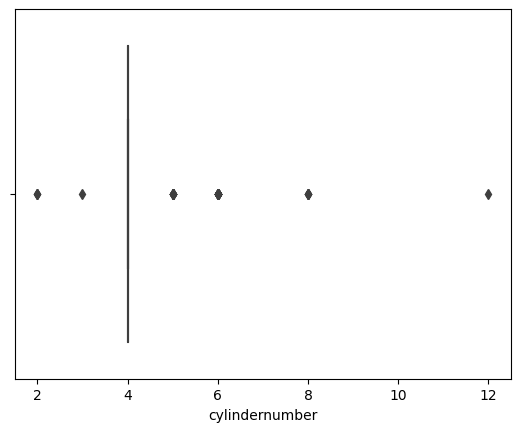

In [57]:
sns.boxplot(x='cylindernumber', data=df)

In [58]:
r_scaler.fit(df[['cylindernumber']])
df['cylindernumber'] =r_scaler.transform(df[['cylindernumber']])

In [59]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,0.316667,0.411171,0.0,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.433333,0.517843,2.0,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.433333,0.329325,0.0,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.508333,0.518231,1.0,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.500000,0.395268,1.0,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<details>
    <summary><i>Here is a screenshot of how your dataframe shoud look like after scaling and encoding</i></summary>
    
    
<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/car_price_after_scaling_and_encoding.png">    

</details>

### `price`

👇 Encode the target `price`.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>price</code> is the target and must be Label encoded.
</details>

In [60]:
df.price.value_counts()

expensive    97
cheap        94
Name: price, dtype: int64

In [61]:
df['price'] = LabelEncoder().fit_transform(df['price'])
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,0.316667,0.411171,0.0,-2.033333,-0.142857,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.433333,0.517843,2.0,0.600000,-0.142857,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.433333,0.329325,0.0,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.508333,0.518231,1.0,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.500000,0.395268,1.0,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


🧪 **Test your code**

In [62]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding',
                         dataset = df)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/rcamoes/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/rcamoes/code/rcamoes2/data-car-prices/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 4 items

test_encoding.py::TestEncoding::test_aspiration PASSED                   [ 25%]
test_encoding.py::TestEncoding::test_enginelocation PASSED               [ 50%]
test_encoding.py::TestEncoding::test_enginetype PASSED                   [ 75%]
test_encoding.py::TestEncoding::test_price PASSED                        [100%]

============================== 4 passed in 0.29s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master



## (5) Base Modelling

👏 The dataset has been preprocessed and is now ready to be fitted to a model. 

❓**Question: a first attempt to evaluate a classification model** ❓

Cross-validate a `LogisticRegression` on this preprocessed dataset and save its score under a variable named `base_model_score`.

In [63]:
df.columns

Index(['aspiration', 'enginelocation', 'carwidth', 'curbweight',
       'cylindernumber', 'stroke', 'peakrpm', 'price', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor'],
      dtype='object')

In [64]:
#Cross validating our score through our features X against target y (price)

X = df.drop(columns=['price'])
y = df['price']

In [65]:
base_model_score = cross_val_score(LogisticRegression(), X, y, cv=5).mean()
base_model_score

0.811336032388664

🧪 **Test your code**

In [66]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/rcamoes/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/rcamoes/code/rcamoes2/data-car-prices/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (6) Feature Selection (with _Permutation Importance_)

👩🏻‍🏫 A powerful way to detect whether a feature is relevant or not to predict a target is to:
1. Run a model and score it
2. Shuffle this feature, re-run the model and score it
    - If the performance significantly dropped, the feature is important and you shoudn't have dropped it
    - If the performance didn't decrease a lot, the feature may be discarded.

❓ **Questions** ❓

1. Perform a feature permutation to detect which features bring the least amount of information to the model. 
2. Remove the weak features from your dataset until you notice model performance dropping substantially
3. Using your new set of strong features, cross-validate a new model, and save its score under variable name `strong_model_score`.

In [67]:
correlation_matrix = df.corr()

# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]


In [68]:
# Computing the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# Showing the top 5 most correlated pairs of feature
corr_df.sort_values(by="absolute_correlation", ascending=False).head(5*2)

,feature_1,feature_2,correlation,absolute_correlation
33,carwidth,curbweight,0.847498,0.847498
47,curbweight,carwidth,0.847498,0.847498
52,curbweight,price,0.767866,0.767866
108,price,curbweight,0.767866,0.767866
107,price,carwidth,0.679997,0.679997
37,carwidth,price,0.679997,0.679997
199,enginetype_ohcv,cylindernumber,0.659851,0.659851
73,cylindernumber,enginetype_ohcv,0.659851,0.659851
49,curbweight,cylindernumber,0.620091,0.620091
63,cylindernumber,curbweight,0.620091,0.620091


In [69]:
from sklearn.inspection import permutation_importance

# Evaluate your model without feature permutation
model = LogisticRegression()
cv_results = cross_validate(model, X, y, cv = 5)
score = cv_results["test_score"].mean()
print(f"Before any feature permutation, the cross-validated accuracy is equal to {round(score,2)}")

## Question 1 - Permutation importance
model = LogisticRegression().fit(X,y) # Fit the model 
permutation_score = permutation_importance(model, X, y, n_repeats=100) # Perform Permutation
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T, # Unstack results
                            columns = ['feature','feature_importance']) 

print("After feature permutation, here are the decreases in terms of scores:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False) # Order by importance
importance_df

Before any feature permutation, the cross-validated accuracy is equal to 0.81
After feature permutation, here are the decreases in terms of scores:


,feature,feature_importance
3,curbweight,0.110681
4,cylindernumber,0.079215
2,carwidth,0.043874
11,enginetype_ohcf,0.035864
10,enginetype_ohc,0.030314
0,aspiration,0.017696
13,enginetype_rotor,0.008063
5,stroke,0.004241
7,enginetype_dohc,0.0
8,enginetype_dohcv,0.0


In [70]:
#Importance threshold = 0.05
threshold = 0.05

In [71]:
weak_features = importance_df[importance_df.feature_importance <= threshold]["feature"].values
weak_features

array(['carwidth', 'enginetype_ohcf', 'enginetype_ohc', 'aspiration',
       'enginetype_rotor', 'stroke', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'peakrpm', 'enginelocation',
       'enginetype_ohcv'], dtype=object)

In [72]:
## Question 3 - Cross validating the model with strong features only
X_strong_features = df.drop(columns=list(weak_features) + ["price"])

print(f"Our strong features are {list(X_strong_features.columns)}")

model = LogisticRegression()

scores = cross_val_score(model, X_strong_features, y, cv = 5)
strong_model_score = scores.mean()

print(f"Before removing weak features, the cross-validated accuracy was equal to {round(score,2)}")

print(f"The LogisticRegression fitted with the strong features only has a score of {round(strong_model_score,2)}")


Our strong features are ['curbweight', 'cylindernumber']
Before removing weak features, the cross-validated accuracy was equal to 0.81
The LogisticRegression fitted with the strong features only has a score of 0.9


🧪 **Test your code**

In [73]:
from nbresult import ChallengeResult

result = ChallengeResult('strong_model',
                         score = strong_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/rcamoes/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/rcamoes/code/rcamoes2/data-car-prices/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_strong_model.py::TestStrong_model::test_strong_model_score PASSED   [100%]

============================== 1 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/strong_model.pickle

git commit -m 'Completed strong_model step'

git push origin master



## Bonus - Stratifying your data ⚖️

💡 As we split our data into training and testing, we need to be mindful of the proportion of categorical variables in our dataset - whether it's the classes of our target `y` or a categorical feature in `X`.

Let's have a look at an example 👇

❓ Split your original `X` and `y` into training and testing data, using sklearn's `train_test_split`; use `random_state=1` and `test_size=0.3` to have comparable results.

In [74]:
X_strong_features

,curbweight,cylindernumber
0,0.411171,0.0
2,0.517843,2.0
3,0.329325,0.0
4,0.518231,1.0
5,0.395268,1.0
...,...,...
200,0.567882,0.0
201,0.605508,0.0
202,0.591156,2.0
203,0.670675,2.0


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_strong_features, y, test_size=0.3, random_state=1)

❓ Check the proportion of `price` class `1` cars in your training dataset and testing dataset.

> _If you check the proportion of them in the raw `df`, it should be very close to 50/50_

In [76]:
print('Training data share of class 1 cars:', y_train.mean())
print('Testing data share of class 1 cars:', y_test.mean())
print('Raw df data share of class 1 cars:', y.mean())

Training data share of class 1 cars: 0.5037593984962406
Testing data share of class 1 cars: 0.5172413793103449
Raw df data share of class 1 cars: 0.5078534031413613


It should still be pretty close to 50/50 ☝️ 

***But what if we change the random state?*** 

❓ Loop through random states 1 through 10, each time calculating the share of `price` class `1` cars in the training and testing data. ❓

In [77]:
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X_strong_features, y, test_size=0.3, random_state=i)
    print('Random State:', i, 'Training data share of class 1 cars:', y_train.mean())
    print('Random State:', i, 'Testing data share of class  1 cars:', y_test.mean())
    

Random State: 1 Training data share of class 1 cars: 0.5037593984962406
Random State: 1 Testing data share of class  1 cars: 0.5172413793103449
Random State: 2 Training data share of class 1 cars: 0.48120300751879697
Random State: 2 Testing data share of class  1 cars: 0.5689655172413793
Random State: 3 Training data share of class 1 cars: 0.5037593984962406
Random State: 3 Testing data share of class  1 cars: 0.5172413793103449
Random State: 4 Training data share of class 1 cars: 0.5338345864661654
Random State: 4 Testing data share of class  1 cars: 0.4482758620689655
Random State: 5 Training data share of class 1 cars: 0.5338345864661654
Random State: 5 Testing data share of class  1 cars: 0.4482758620689655
Random State: 6 Training data share of class 1 cars: 0.49624060150375937
Random State: 6 Testing data share of class  1 cars: 0.5344827586206896
Random State: 7 Training data share of class 1 cars: 0.5338345864661654
Random State: 7 Testing data share of class  1 cars: 0.4482758

You will observe that the proportion changes every time, sometimes even quite drastically 😱! This can affect model performance!

❓ Compare the test score of a logistic regression when trained using `train_test_split(random_state=1)` _vs._ `random_state=9` ❓ 

Remember to fit on training data and score on testing data.

In [78]:
model_1 = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model_1.fit(X_train, y_train)

model_1.score(X_test, y_test)

0.8275862068965517

In [79]:
model_9 = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

model_9.fit(X_train, y_train)

model_9.score(X_test, y_test)

0.8620689655172413

👀 You should see a much lower score with `random_state=9` because the proportion of class `1` cars in that test set is 34.5%, quite far from the 57.9% in the training set or even the 50% in the original dataset.

This is substantial, as this accidental imbalance in our dataset can not only make model performance worse, but also distort the "reality" during training or scoring 🧐

***So how do we fix this issue? How do we keep the same distribution of classes across the train set and the test set? 🔧***

🎁 Luckily, this is taken care of by `cross_validate` in sklearn, when the estimator (a.k.a the model) is a classifier and the target is a class. Check out the documentation of the `cv` parameter in 📚 [**sklearn.model_selection.cross_validate**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).

The answer is to use the following:

>📚 [**Stratification**](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)

### Stratification of the target

💡 We can also use the ***strafification*** technique in a `train_test_split`.

❓ Run through the same 1 to 10 random state loop again, but this time also ***pass `stratify=y` into the holdout method***. ❓

In [82]:
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X_strong_features, y, test_size=0.3, random_state=i, stratify=y)
    print('Random State:', i, 'Training data share of class 1 cars:', y_train.mean())
    print('Random State:', i, 'Testing data share of class  1 cars:', y_test.mean())

Random State: 1 Training data share of class 1 cars: 0.5112781954887218
Random State: 1 Testing data share of class  1 cars: 0.5
Random State: 2 Training data share of class 1 cars: 0.5112781954887218
Random State: 2 Testing data share of class  1 cars: 0.5
Random State: 3 Training data share of class 1 cars: 0.5112781954887218
Random State: 3 Testing data share of class  1 cars: 0.5
Random State: 4 Training data share of class 1 cars: 0.5112781954887218
Random State: 4 Testing data share of class  1 cars: 0.5
Random State: 5 Training data share of class 1 cars: 0.5112781954887218
Random State: 5 Testing data share of class  1 cars: 0.5
Random State: 6 Training data share of class 1 cars: 0.5112781954887218
Random State: 6 Testing data share of class  1 cars: 0.5
Random State: 7 Training data share of class 1 cars: 0.5112781954887218
Random State: 7 Testing data share of class  1 cars: 0.5
Random State: 8 Training data share of class 1 cars: 0.5112781954887218
Random State: 8 Testing d

👀 Even if the random state is changing, the proportion of classes inside the training and testing data is kept the same as in the original `y`. This is what _stratification_ is.

Using `train_test_split` with the `stratify` parameter, we can also preserve proportions of a feature across training and testing data. This can be extremely important, for example:

- preserving proportion of male and female customers in predicting churn 🙋‍♂️ 🙋
- preserving the proportion big and small houses in predicting their prices 🏠 🏰
- preserving distribution of 1-5 review scores (multiclass!) in recommending the next product 🛍️
- etc...

For instance, in our dataset, to holdout the same share of `aspiration` feature in both training and testing data, we could simply write `train_test_split(X, y, test_size=0.3, stratify=X.aspiration)`

---

As we saw, **`cross_validate` [can automatically stratify the target](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#:~:text=For%20int/None%20inputs%2C%20if%20the%20estimator%20is%20a%20classifier%20and%20y%20is%20either%20binary%20or%20multiclass%2C%20StratifiedKFold%20is%20used.), but not the features...** 🤔 We need a bit of extra work for that.

We need `StratifiedKFold` 🔬



### Stratification - generalized

📚 [**StratifiedKFold**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) allows us to split the data into `K` splits, while stratifying on certain columns (features or target).

This way, we can do a manual cross-validation while keeping proportions on the categorical features of interest - let's try it with the binary `aspiration` feature:

In [81]:
from sklearn.model_selection import StratifiedKFold

# initializing a stratified k-fold that will split the data into 5 folds
skf = StratifiedKFold(n_splits=5)
scores = []

# .split() method creates an iterator; 'X.aspiration' is the feature that we stratify by
for train_indices, test_indices in skf.split(X, X.aspiration):
    
    # 'train_indices' and 'test_indices' are lists of indices that produce proportional splits
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # initialize and fit a model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # append a score to get an average of 5 folds in the end
    scores.append(model.score(X_test, y_test))
    
np.array(scores).mean()

0.8110661268556006

📖 Some sklearn reads on **stratification**:

- [Visualization of how different holdout methods in sklearn work](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py)
- [Overall cross-validation and stratification understanding](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)

🏁 Congratulations! You have prepared a whole dataset, ran feature selection and even learned about stratification 💪

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!